# グラフ理論の基礎
### ねらい
* グラフ理論の基礎を学ぶ

### 例として、日本の都道府県の県庁所在地の緯度・経度のデータを使います。
まずはデータのダウンロードから

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib # Python 2 の場合
# import urllib.request # Python 3 の場合

In [2]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt'

In [3]:
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'location.txt') # Python 2 の場合
# urllib.request.urlretrieve(url, 'location.txt') # Python 3 の場合

('location.txt', <httplib.HTTPMessage instance at 0x104115ef0>)

In [4]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = [] # ０列目の数字を格納する予定のリスト
col2 = [] # １列目の数字を格納する予定のリスト
col3 = [] # ２列目の数字を格納する予定のリスト
for i, line in enumerate(open('location.txt')): # ファイルを開いて一行一行読み込む
    if i == 0: # ０番目の行の場合
        continue # 次の行に行く
    c = line.split(",") # 行を空白文字で分割したものをcというリストに入れる
    col1.append(c[0]) # ０列目の単語col1に入れる
    col2.append(float(c[1])) # １列目の単語を実数に変換してcol2に入れる
    col3.append(float(c[2])) # ２列目の単語を実数に変換してcol3に入れる

In [5]:
# 都市名のリスト
print (col1)

['Sapporo', 'Aomori', 'Morioka', 'Sendai', 'Akita', 'Yamagata', 'Fukushima', 'Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Tokyo', 'Yokohama', 'Niigata', 'Toyama', 'Kanazawa', 'Fukui', 'Kofu', 'Nagano', 'Gifu', 'Shizuoka', 'Nagoya', 'Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Kobe', 'Nara', 'Wakayama', 'Tottori', 'Matsue', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Takamatsu', 'Matsuyama', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima', 'Naha']


In [6]:
# 緯度のリスト
print (col2)

[43.06417, 40.82444, 39.70361, 38.26889, 39.71861, 38.24056, 37.75, 36.34139, 36.56583, 36.39111, 35.85694, 35.60472, 35.68944, 35.44778, 37.90222, 36.69528, 36.59444, 36.06528, 35.66389, 36.65139, 35.39111, 34.97694, 35.18028, 34.73028, 35.00444, 35.02139, 34.68639, 34.69139, 34.68528, 34.22611, 35.50361, 35.47222, 34.66167, 34.39639, 34.18583, 34.06583, 34.34028, 33.84167, 33.55972, 33.60639, 33.24944, 32.74472, 32.78972, 33.23806, 31.91111, 31.56028, 26.2125]


In [7]:
# 経度のリスト
print (col3)

[141.34694, 140.74, 141.1525, 140.87194, 140.1025, 140.36333, 140.46778, 140.44667, 139.88361, 139.06083, 139.64889, 140.12333, 139.69167, 139.6425, 139.02361, 137.21139, 136.62556, 136.22194, 138.56833, 138.18111, 136.72222, 138.38306, 136.90667, 136.50861, 135.86833, 135.75556, 135.52, 135.18306, 135.83278, 135.1675, 134.23833, 133.05056, 133.935, 132.45944, 131.47139, 134.55944, 134.04333, 132.76611, 133.53111, 130.41806, 130.29889, 129.87361, 130.74167, 131.6125, 131.42389, 130.55806, 127.68111]


### データの図示

In [8]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

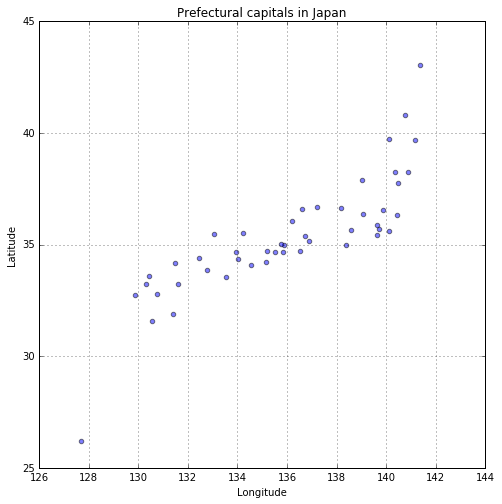

In [9]:
#地図上に都市をプロットする
plt.figure(figsize=(8, 8))
plt.scatter(col3, col2, alpha=0.5)
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

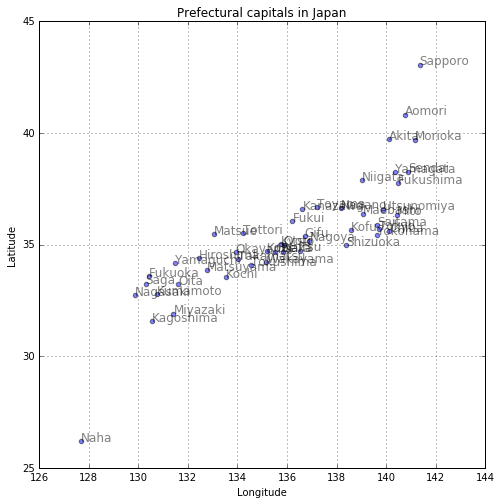

In [10]:
#都市名も書く
plt.figure(figsize=(8, 8))
plt.scatter(col3, col2, alpha=0.5)
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.5, size=12)
plt.show()

### 都市間の距離を求める

In [11]:
# 都市間の距離を求める関数を作る。
import math
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [12]:
# すべての都市間で都市間の距離を計算する。
dist = []
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        dist.append(distance(city1[1], city1[2], city2[1], city2[2]))

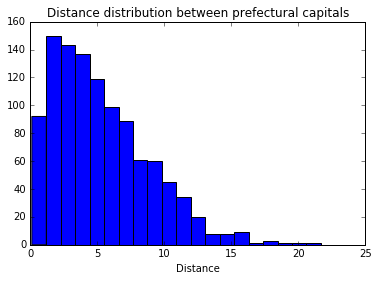

In [13]:
# 都市間距離の分布を見る
plt.hist(dist, bins=20)
plt.title("Distance distribution between prefectural capitals")
plt.xlabel("Distance")
plt.show()

### 都市間に線を引く

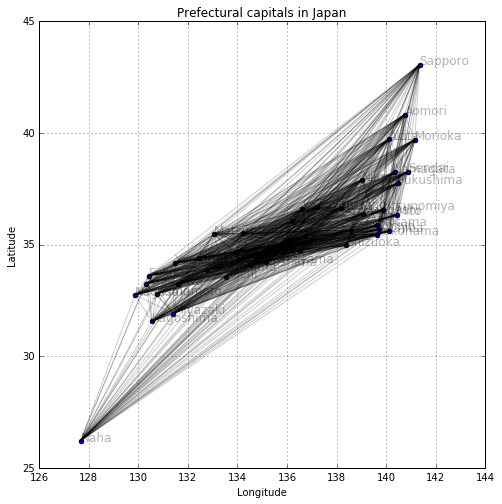

In [14]:
#すべての都市間に線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

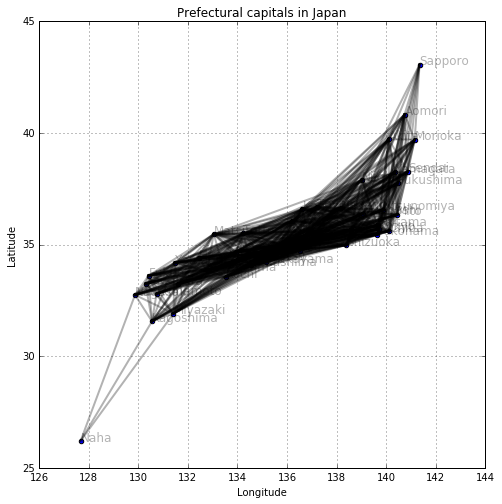

In [15]:
#水平移動距離7以下の都市間だけ線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, y1, x2, y2) > 7:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, lw=2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

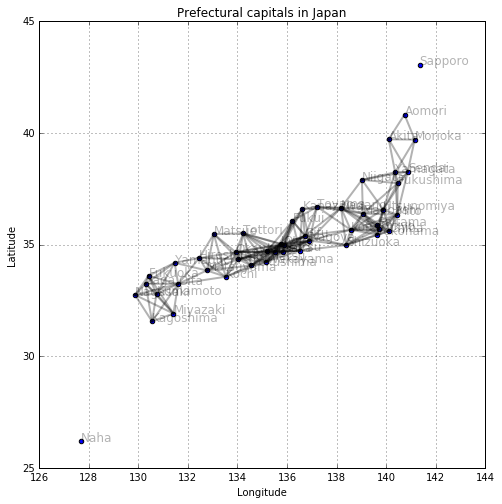

In [16]:
#水平移動距離2以下の都市間だけ線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, y1, x2, y2) > 2:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, lw=2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

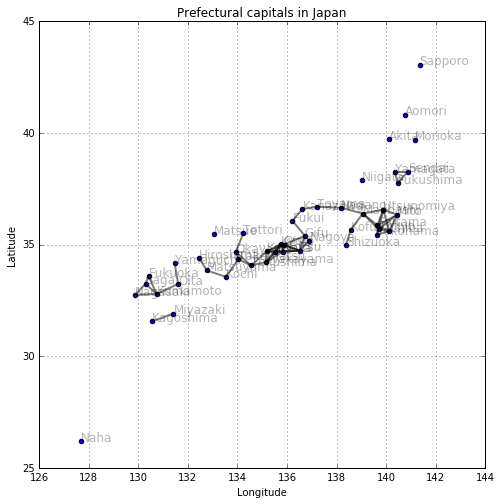

In [17]:
#水平移動距離１以下の都市間だけ線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, y1, x2, y2) > 1:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.5, lw=2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

### 連結している都市の組をすべて取り出す
ここで、「連結している都市の組」とは、「水平移動距離１以下の都市の組」を指すものとします。

In [18]:
edges = []
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        if distance(city1[1], city1[2], city2[1], city2[2]) > 1:
            continue
        edges.append((city1[0], city2[0]))

In [19]:
print (edges)

[('Sendai', 'Yamagata'), ('Sendai', 'Fukushima'), ('Yamagata', 'Fukushima'), ('Mito', 'Utsunomiya'), ('Mito', 'Saitama'), ('Mito', 'Chiba'), ('Mito', 'Tokyo'), ('Utsunomiya', 'Maebashi'), ('Utsunomiya', 'Saitama'), ('Utsunomiya', 'Chiba'), ('Utsunomiya', 'Tokyo'), ('Maebashi', 'Saitama'), ('Maebashi', 'Tokyo'), ('Maebashi', 'Kofu'), ('Maebashi', 'Nagano'), ('Saitama', 'Chiba'), ('Saitama', 'Tokyo'), ('Saitama', 'Yokohama'), ('Chiba', 'Tokyo'), ('Chiba', 'Yokohama'), ('Tokyo', 'Yokohama'), ('Toyama', 'Kanazawa'), ('Toyama', 'Nagano'), ('Kanazawa', 'Fukui'), ('Fukui', 'Gifu'), ('Kofu', 'Shizuoka'), ('Gifu', 'Nagoya'), ('Gifu', 'Tsu'), ('Gifu', 'Otsu'), ('Nagoya', 'Tsu'), ('Tsu', 'Otsu'), ('Tsu', 'Kyoto'), ('Tsu', 'Osaka'), ('Tsu', 'Nara'), ('Otsu', 'Kyoto'), ('Otsu', 'Osaka'), ('Otsu', 'Kobe'), ('Otsu', 'Nara'), ('Kyoto', 'Osaka'), ('Kyoto', 'Kobe'), ('Kyoto', 'Nara'), ('Kyoto', 'Wakayama'), ('Osaka', 'Kobe'), ('Osaka', 'Nara'), ('Osaka', 'Wakayama'), ('Kobe', 'Nara'), ('Kobe', 'Wakayama

### 自分と連結している都市のリストを格納した辞書を作成する

In [20]:
neighbor = {}
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        if distance(city1[1], city1[2], city2[1], city2[2]) > 1:
            continue
        if city1[0] not in neighbor.keys():
            neighbor.update({city1[0]:[]})
        if city2[0] not in neighbor[city1[0]]:
            neighbor[city1[0]].append(city2[0])
        if city2[0] not in neighbor.keys():
            neighbor.update({city2[0]:[]})
        if city1[0] not in neighbor[city2[0]]:
            neighbor[city2[0]].append(city1[0])

In [21]:
print (neighbor)

{'Utsunomiya': ['Mito', 'Maebashi', 'Saitama', 'Chiba', 'Tokyo'], 'Wakayama': ['Kyoto', 'Osaka', 'Kobe', 'Nara', 'Tokushima'], 'Nagasaki': ['Saga', 'Kumamoto'], 'Tokyo': ['Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Yokohama'], 'Okayama': ['Tottori', 'Tokushima', 'Takamatsu'], 'Miyazaki': ['Kagoshima'], 'Nagano': ['Maebashi', 'Toyama'], 'Toyama': ['Kanazawa', 'Nagano'], 'Maebashi': ['Utsunomiya', 'Saitama', 'Tokyo', 'Kofu', 'Nagano'], 'Nagoya': ['Gifu', 'Tsu'], 'Chiba': ['Mito', 'Utsunomiya', 'Saitama', 'Tokyo', 'Yokohama'], 'Sendai': ['Yamagata', 'Fukushima'], 'Tokushima': ['Kobe', 'Wakayama', 'Okayama', 'Takamatsu'], 'Kofu': ['Maebashi', 'Shizuoka'], 'Oita': ['Yamaguchi', 'Kumamoto'], 'Kobe': ['Otsu', 'Kyoto', 'Osaka', 'Nara', 'Wakayama', 'Tokushima'], 'Otsu': ['Gifu', 'Tsu', 'Kyoto', 'Osaka', 'Kobe', 'Nara'], 'Tsu': ['Gifu', 'Nagoya', 'Otsu', 'Kyoto', 'Osaka', 'Nara'], 'Nara': ['Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Kobe', 'Wakayama'], 'Hiroshima': ['Matsuyama'], 'Matsuyama': [

### 深さ優先探索
深さ優先探索（ふかさゆうせんたんさく、英: depth-first search, DFS、バックトラック法ともいう）は、木やグラフを探索するためのアルゴリズムである。アルゴリズムは根から(グラフの場合はどのノードを根にするか決定する)始まり、バックトラックするまで可能な限り探索を行う。「縦型探索」とも呼ばれる。https://ja.wikipedia.org/wiki/%E6%B7%B1%E3%81%95%E5%84%AA%E5%85%88%E6%8E%A2%E7%B4%A2
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2c/Depthfirst.png" width="300">

In [24]:
def depth_first(neighbor, start):
    visited = []
    stack = []
    stack.append(start)
    while len(stack) > 0:
        next_city = stack.pop()
        if next_city in visited:
            continue
        print (next_city)
        visited.append(next_city)
        for nei in neighbor[next_city]:
            stack.append(nei)

In [25]:
depth_first(neighbor, 'Tokyo')

Tokyo
Yokohama
Chiba
Saitama
Maebashi
Nagano
Toyama
Kanazawa
Fukui
Gifu
Otsu
Nara
Wakayama
Tokushima
Takamatsu
Kochi
Matsuyama
Hiroshima
Okayama
Tottori
Kobe
Osaka
Kyoto
Tsu
Nagoya
Kofu
Shizuoka
Utsunomiya
Mito


### 幅優先探索
幅優先探索（はばゆうせんたんさく、英: breadth first search）はグラフ理論(Graph theory)において木構造(tree structure)やグラフ(graph)の探索に用いられるアルゴリズム。アルゴリズムは根ノードで始まり隣接した全てのノードを探索する。それからこれらの最も近いノードのそれぞれに対して同様のことを繰り返して探索対象ノードをみつける。「横型探索」とも言われる。深さ優先探索と、幅優先探索の探索順序の違いは下図の通り。
<img src="http://www.unfindable.net/images/search/dfs-bfs.png">

In [31]:
from collections import deque
def width_first(neighbor, start):
    visited = []
    queue = deque([])
    queue.append(start)
    while len(queue) > 0:
        next_city = queue.popleft()
        if next_city in visited:
            continue
        print (next_city)
        visited.append(next_city)
        for nei in neighbor[next_city]:
            queue.append(nei)

In [32]:
width_first(neighbor, 'Tokyo')

Tokyo
Mito
Utsunomiya
Maebashi
Saitama
Chiba
Yokohama
Kofu
Nagano
Shizuoka
Toyama
Kanazawa
Fukui
Gifu
Nagoya
Tsu
Otsu
Kyoto
Osaka
Nara
Kobe
Wakayama
Tokushima
Okayama
Takamatsu
Tottori
Kochi
Matsuyama
Hiroshima
